# Analysis of a smaller problem

In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import networkx as nx
import tsplib95

In [2]:
problem = tsplib95.load("tsp_problems/ulysses16.tsp")
graph = problem.get_graph()
# remove self loops
graph.remove_edges_from(nx.selfloop_edges(graph))
# rename nodes to start from 0
graph = nx.relabel_nodes(graph, {node: node-1 for node in graph.nodes})
print("Nodes in graph:", graph.nodes)
print("Edges in graph:", graph.edges)

Nodes in graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Edges in graph: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (10, 11), (1

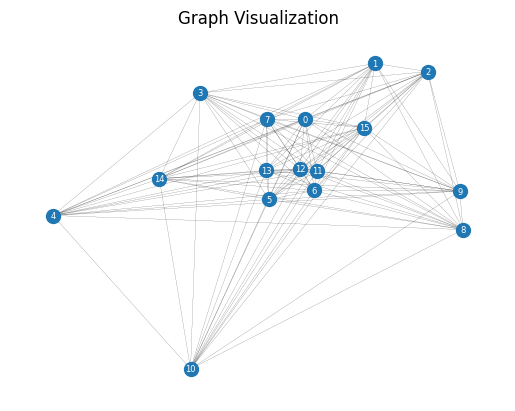

In [3]:
plot_graph(graph)

In [4]:
# compute mean distance of a path between all nodes and the distance between nodes
mean_distance = 0
n = len(graph.nodes)
for i in range(n):
    neighbours = get_neighbours(graph, i)
    mean_distance += np.mean([graph[i][n]['weight'] for n in neighbours])
    
print("Average distance of a random path:", mean_distance)
mean_edge = mean_distance/n
print("Average weight of an edge", mean_edge)

max_v = 0
min_v = 100000
for i in range(n):
    neighbours = get_neighbours(graph, i)
    max_ = np.max([graph[i][n]['weight'] for n in neighbours])
    min_ = np.min([graph[i][n]['weight'] for n in neighbours])
    if min_ < min_v:
        min_v = min_
    if max_ > max_v:
        max_v = max_
print("Min weight of an edge:", min_v)
print("Max weight of an edge:", max_v)

Average distance of a random path: 13028.266666666666
Average weight of an edge 814.2666666666667
Min weight of an edge: 52
Max weight of an edge: 2789


In [5]:
min_path, cost = min_path_cost(graph)

print("Hamiltonian Circuit:", min_path)
print("Path Length:", len(min_path))
print("Heuristic min cost:", cost)

norm = cost/mean_edge
print("Norm constant", norm)
print("Min weight normalised", min_v*norm)
print("Max weight normalised",max_v*norm)

Hamiltonian Circuit: [3, 7, 0, 15, 12, 13, 11, 6, 5, 14, 4, 9, 8, 2, 1, 10, 3]
Path Length: 17
Heuristic min cost: 10067
Norm constant 12.363271655477321
Min weight normalised 642.8901260848207
Max weight normalised 34481.16464712625


In [45]:
n = len(graph.nodes)
rate = 5
tsp = TSP(graph, alpha=1., beta=3., alpha_rate=0.95 , beta_rate=1.05, rate=rate, rho=0.7, max_iter=1000, k=int(np.sqrt(n)), heuristic_cost=cost, norm=cost/mean_edge, opt=False, check_improvement=False, update_steps=300)
path = tsp.solve()

Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero pheromone
Zero phero

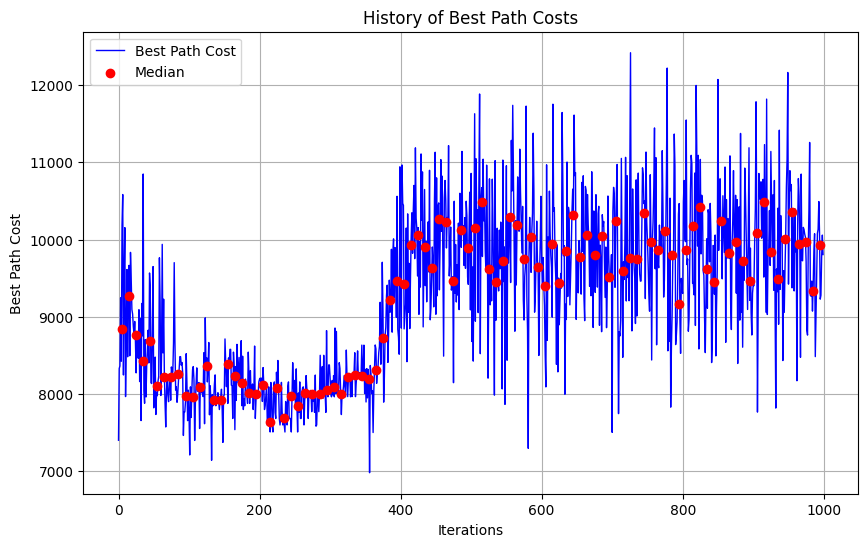

In [44]:
plot_history(tsp.history, 10)

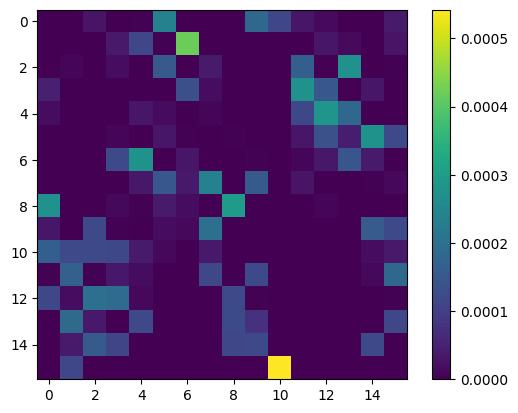

In [28]:
imshow(np.asarray(tsp.pheromone))
plt.colorbar()
plt.show()

7069
17


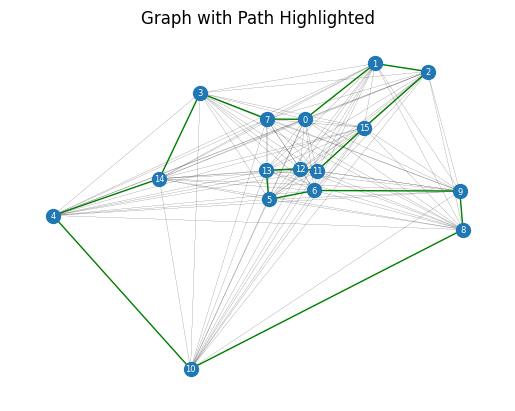

In [29]:
print(path.cost)
print(len(path.path))
plot_path(graph, path.path)

[8, 9, 6, 5, 13, 12, 11, 15, 0, 7, 2, 1, 3, 14, 4, 10, 8]
6950


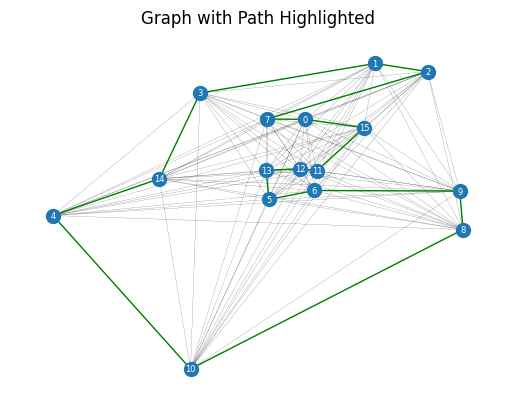

In [30]:
path.opt_alg()
print(path.path)
print(path.cost)
plot_path(graph, path.path)

In [31]:
tsp_sol = nx.approximation.traveling_salesman_problem(graph, cycle=True)
if len(tsp_sol) > 128:
    seen = set()
    unique_tsp_sol = [x for x in tsp_sol if not (x in seen or seen.add(x))]
    tsp_sol = unique_tsp_sol
    tsp_sol.append(tsp_sol[0])
    print(len(tsp_sol))

tsp_solution = Path(tsp_sol)
cost = tsp_solution.cost
tsp_solution_opt = Path(tsp_sol)
tsp_solution_opt.opt_alg()
cost_opt = tsp_solution_opt.cost

print("Cost with Christofides:", cost)
print("Best cost with 2-opt + Crisophides:", cost_opt)

Cost with Christofides: 6983
Best cost with 2-opt + Crisophides: 6875


Cost of the best optimised random path: 6859


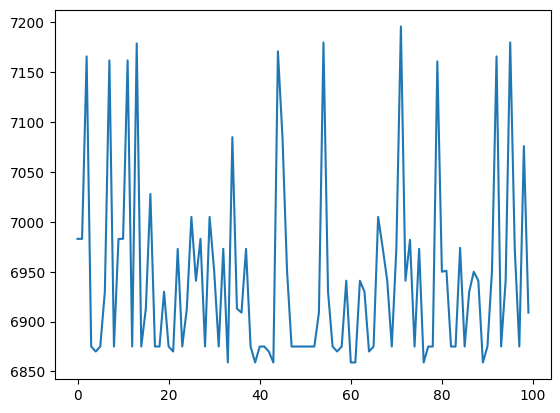

In [32]:
history = []
best_cost = 1000000
for i in range(100):
    random_path = list(range(len(graph.nodes)))
    random.shuffle(random_path)
    random_path = random_path + [random_path[0]]
    random_path = Path(random_path)
    random_path.opt_alg()
    if random_path.cost < best_cost:
        best_cost = random_path.cost
    history.append(random_path.cost)

print("Cost of the best optimised random path:", best_cost)
plt.plot(history)
plt.show()